# Reseaux de Neurones avec PyTorch

In [13]:
%matplotlib inline
import torch as t
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

#### Ce TP se situe dans la suite du TP precedent.
#### Dans un premier temps, vous creerez ici un seul neurone avec pyTorch (equivalent a  la regression logistique)
#### Ensuite, vous connecterez plusieurs neurones pour faire un reseau

## Partie 0 - Quelques fonctions utiles (a ne pas lire. passez a la suite directement)

In [ ]:
def visualize_classifier(X, y, predict=None,ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y.data.numpy(), s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    #ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    if predict:
        xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                             np.linspace(*ylim, num=200))
        xxyy   = np.c_[xx.ravel(), yy.ravel()]
        Z      = np.array([predict(Variable(t.from_numpy(d)).float()).data.numpy() for d in xxyy]).reshape(xx.shape)

        # Create a color plot with the results
        n_classes = len(np.unique(y.data.numpy()))
        contours = ax.contourf(xx, yy, Z, alpha=0.3,
                               levels=np.arange(n_classes + 1) - 0.5,
                               cmap=cmap, clim=(y.min(), y.max()),
                               zorder=1)

        ax.set(xlim=xlim, ylim=ylim)


## Partie 1 : construction manuelle d'un seul neurone

In [ ]:
n=400

d'abord, je cree un mini jeu de donnees.

X sera une matrice de n lignes et 2 colones, tiree au hazard

pour chaque ligne i, y[i] sera une classe (0 ou 1) selon les coordonnees du point X[i]

In [ ]:
X = Variable(t.randn(n,2))
y = X[:,0]-2*X[:,1]>0

visualize_classifier(X,y)

Ci-dessous, le code necessaire pour faire une regression logistique

In [ ]:
# Voici le code d'une regression logistique
# C'est la meme chose qu'un neurone classique

beta1 = Variable(t.Tensor([0]),requires_grad=True)
beta2 = Variable(t.Tensor([0]),requires_grad=True)

for trials in range(10*n):
    # je choisis un exemple au hasard
    i = np.random.randint(n)

    # je calcule la prediction
    z = beta1*X[i,0]+beta2*X[i,1]
    a = 1/(1+t.exp(-z))

    # je calcule le cout de cette prediction
    if y.data[i] == 1:
        e = -t.log(a)
    else:
        e = -t.log(1-a)

    # je calcule les gradients
    e.backward()

    # je descend le gradient
    beta1.data -= 0.1 * beta1.grad.data
    beta2.data -= 0.1 * beta2.grad.data

    # je remet le gradient a zero
    beta1.grad.data.zero_()
    beta2.grad.data.zero_()

#print("predictions de probabilites = ",g(-(beta0+beta1*X)))
print(beta1,beta2)

#### exercice:
Dans le code ci-dessus, la combinaison lineaire n'a pas d'intercept puisque `z=beta1*X[i,0]+beta2*X[i,1]`
Rajoutez un intercept beta0 afin qu'on ait `z=beta0+beta1*X[i,0]+beta2*X[i,1]`

Remarque: si on representait notre code sous la forme d'un neurone, ca donnerai ce dessin:

![alt text](un_neurone.png)

#### exercice:

reorganisez le precedent code en ecrivant trois fonction `predict`,`cout` et `descend_gradient`. Pour cela, vous completerez le code qui suit:


In [ ]:
# Voici le code d'une regression logistique
# C'est la meme chose qu'un neurone classique

beta0 = Variable(t.Tensor([0]),requires_grad=True)
beta1 = Variable(t.Tensor([0]),requires_grad=True)
beta2 = Variable(t.Tensor([0]),requires_grad=True)

def g(z):
    return 1/(1+t.exp(-z))

# fonction qui renvoie la prediction du neurone
def predict(xi,beta0,beta1,beta2):
    # ecrire ici le code manquant
    ...

# fonction qui calcule le cout
def cout(yi,a):
    # ecrire le code manquant
    ...

def descend_gradient(beta0,beta1,beta2):
    # ecrire ici le code manquant
    ...

In [ ]:
for trials in range(10*n):
    # je choisis un exemple au hasard
    i = np.random.randint(n)

    # je calcule la prediction
    a = predict(X[i],beta0,beta1,beta2)

    # je calcule le cout de cette prediction
    e = cout(y.data[i],a)

    # je calcule les gradients
    e.backward()

    # je descend le gradient et je le mets a zero
    descend_gradient(beta0,beta1,beta2)

# affichage graphique du resultat:
visualize_classifier(X, y, partial(predict,beta0=beta0,beta1=beta1,beta2=beta2))

## Partie 2 : construction manuelle d'un petit reseau

In [ ]:
# On va prendre des donnees non separables lineairement:
X = Variable(t.randn(n,2))
y = X[:,0]**2-2*X[:,1]>0

visualize_classifier(X,y)

#### exercice:
Implémentez le réseau ci-dessous, qui compte 12 parametres. Lancez l'apprentissage sur ces donnees

![alt text](reseau_de__neurones.png)

si possible, essayez d'avoir une fonction globale `predict(xi)` qu'on pourra utiliser pour visualiser le classifieur

#### exercice:
Ecrivez une fonction qui calcule le taux d erreur de votre reseau sur votre jeu de donnees

Essayez des architectures avec plus de couches. Qu'obtenez-vous ?

## Partie 3 -  Question bonus - classification d'images avec mnist

In [27]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X = mnist.train.images[:10000]
y = np.dot( mnist.train.labels, np.arange(10)) % 2

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz



chaque X[i] represente une image 28x28. Comme on a mis la valeur de tous les pixels en ligne, X[i] est un vecteur de taille 784 (=28x28)

donc X est une matrice 10000x784, puisqu'il y a 10000 chiffres representes.

chaque y[i] est egale a 1 si le chiffre est impair, et 0 si le chiffre est pair

0.0

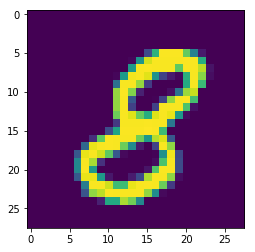

In [31]:
# affichage de l'exemple numero 5
plt.imshow(X[5].reshape(28,28))
y[5]

#### exercice:

Appliquez la regression logistique sur ces donnees